
# Project: TMDB Movies Exploration!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB Movies dataset has 10,000 Movies for the last 50 years and it's information. 

 ## Questions:
> 1- Which year has most/least number of movies released?

> 2- Which movies have avg rating and in which year?

> 3- Which year had a high profit margin cross all movies?

> 4- Which year has a high or low percentage of profitable movies?

> 5- Which genre has mostly released cross year?

> 6- Which director had high average profit and their movies was had a higher voting rate?

In [1]:
# Importing the necessary Packages for exploring movies dataset:

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# After uploading the file in the kernel, Will upload it in the notebook to proceed with the analysis.
#  Then looking into the head/tail dataset sample to explore any unstructured data.
movies = pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movies.tail()
# Noticed here that some variables Budget & revenue column has no value as well as N/A values in other columns.
# it's better to delete them in order for static analysis.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
movies.shape
# So we have 10866 Rows and 21 columns

(10866, 21)



### Data Cleaning (Looking for zero/Null/datatypes error values!)

In [5]:
# Will start by looking for the dataset information, rows and columns number, null values and data types and ending with
#   zero values that change static analysis.

In [6]:
movies.info()
# After comparing the data types and head/tail sample, only "release_date" column not defined as the date
#   And it will be needed to be modified below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# here describing dataset for the descriptive statistics,
movies.describe()

#   And it refers to some columns has null values in addition to the last cell as well:

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
sum(movies.duplicated())
#Only "one" duplicate value found, and it's better to be removed, value is in a row: 2090 and id = 42194 as it will not
# show again in the text cell as it will be replaced

1

In [9]:
# Here the code for drop the only duplicate value found in the dataset.
movies.drop_duplicates(inplace=True)

In [10]:
# Here it looks for the N/A not found values in the dataset, and it's better to be replaced based on the column data type:
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Here it will replace the zero value in runtime with null values & convert the column release_date to date data type:
movies['runtime'] = movies['runtime'].replace(0,np.NAN)
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'].head(2)
movies['release_date'].tail(2)

10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

In [12]:
# the Last action will be removing the budget and revenue zero values:
movies = movies[movies['budget'] & movies['revenue'] != 0 ]

#Assign the new dataset without Zeros values in Budget and revenue.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which year has most/least number of movies released?)

Text(0,0.5,'Number of movies released')

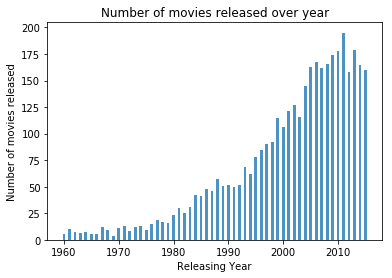

In [13]:
n_movies = pd.DataFrame(movies.groupby('release_year').count()['id'],  index=None).sort_values(by = 'release_year')
n_movies

plt.bar(n_movies.index, n_movies['id'], align='center', alpha=0.8, width = 0.5)
plt.title('Number of movies released over year')
plt.xlabel('Releasing Year')
plt.ylabel('Number of movies released')

### Q1 Find out: 
- This chart shows that year over year movies are increasing and this predicts that the next years' movies will increase more again.

### Research Question 2  (Which movies have avg rating and in which year?)

Text(0,0.5,'Average votes rating')

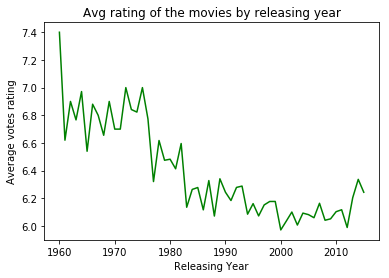

In [14]:
avg_rating_year = pd.DataFrame(movies.groupby('release_year').mean()['vote_average'])
avg_rating_year.round({"vote_average":1})

plt.plot(avg_rating_year.index, avg_rating_year['vote_average'], color='g')
plt.title('Avg rating of the movies by releasing year')
plt.xlabel('Releasing Year')
plt.ylabel('Average votes rating')

### Q2 Find out: 
- This line chart shows that year over year movies average rating are going down against that more movies going to release

- As the year 1960 is the highest rating year and 2000 is the lowest one.

### Research Question 3  (Which year had a high profit margin cross all movies?)

Text(0,0.5,'Releasing Year')

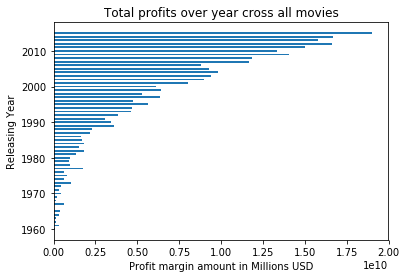

In [15]:
movies['profit'] = movies['revenue'] - movies['budget']
profit_movies = pd.DataFrame(movies.groupby('release_year').sum()['profit'])
profit_movies


plt.barh(profit_movies.index, profit_movies['profit'], height = 0.5, align = 'center')
plt.title('Total profits over year cross all movies')
plt.xlabel('Profit margin amount in Millions USD')
plt.ylabel('Releasing Year')

### Q3 Find out: 
- Movies are increasing across the years and the total profit also increases highly

### Research Question 4  (Which year has a high or low percentage of profitable movies?)

Text(0,0.5,'% of profitable movies from the total')

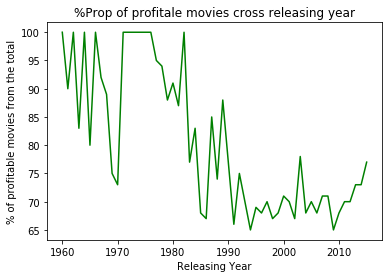

In [16]:
# Filtering the movies which are profitable (above zero values)
filter_profit = movies[movies['profit'] >= 0]

# Create two table for number movies are profitable and the total movies 
profit_flag = pd.DataFrame(filter_profit.groupby('release_year').count()['profit'])
Total_flag = pd.DataFrame(movies.groupby('release_year').count()['profit'])

# Adding two table to each other to get the prop% of profitable movies from the total
Merge_table_profit = pd.merge(Total_flag, profit_flag, left_on= 'release_year', right_on= 'release_year', how='left')
Merge_table_profit['prop_profits'] = pd.DataFrame(round((Merge_table_profit['profit_y'] / Merge_table_profit['profit_x']),2)*100.00)

#Ploting the %prop to understand which year has the most/least percentage of profits movies.
plt.plot(Merge_table_profit.index, Merge_table_profit['prop_profits'], color = "g")
plt.title('%Prop of profitale movies cross releasing year')
plt.xlabel('Releasing Year')
plt.ylabel('% of profitable movies from the total')

### Q4 Find out: 
- Looking at the chart finding that first 20 years have high % of profitable movies against the last 20 years this percent drop down but with the flow of the previous chart that with year increase total profit increase as well and this due to the number of movies increasing cross all years.

### Research Question 5  (Which genre has mostly released cross year?)

In [17]:
movies_geners = pd.DataFrame(movies[['id', 'release_year', 'profit', 'vote_average', 'popularity','genres']])
movies_geners['genres'] = movies_geners['genres'].str.split("|", expand = False)

genre = movies_geners['genres']

Text(0,0.5,'Number of movies has genre')

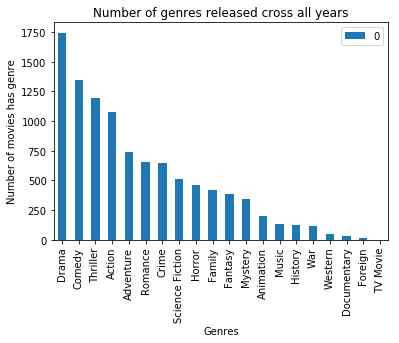

In [18]:
# Adding all rows each other to make them like one list, then count the values inside the total list:
concat_genres = movies['genres'].str.cat(sep = '|')
new_genres = pd.Series(concat_genres.split('|'))
count_genres =  pd.DataFrame(new_genres.value_counts(), index=None)
count_genres
# Plotting which genres are released across all years:

count_genres.plot(kind = 'bar')
plt.title('Number of genres released cross all years')
plt.xlabel('Genres')
plt.ylabel('Number of movies has genre')

### Q5 Find out: 
- The drama has the highest number of movies contain it, while Foreign and TV movie has the lowest one.

### Research Question 6  (Which director had high average profit and their movies was had a higher voting rate?)

Text(0,0.5,'Average profit gained cross movies')

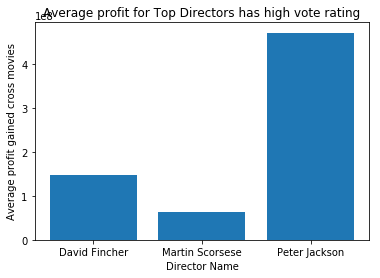

In [19]:
## Looking at the directors who create at least 10 movies and look for the profit created and the voting average for his/her movie.

# This is separate aggression for a number of movies created by director,
#  average of profit he/she gains across his/her movies and lasts the average voting he/she gets
directors_count = pd.DataFrame(movies.groupby('director').count()['id'].sort_values())
profit_by_director = pd.DataFrame(movies.groupby('director').mean()['profit'].sort_values())
Voting_by_director = pd.DataFrame(movies.groupby('director').mean()['vote_average'].sort_values())

# TOP_directors_10Movies is for the directors who created at least 10 movies: 
TOP_directors_10Movies = directors_count[directors_count['id'] >= 10]

# Merging the three tables to create one data frame for best plotting: 
director_data = pd.merge(TOP_directors_10Movies,profit_by_director, left_on='director', right_on='director', how='left')
director_data = pd.merge(director_data, Voting_by_director, left_on='director', right_on='director', how='left')
director_data['vote_average'] = round(director_data['vote_average'],1)
#Choose the only directors who are highly rated votes.
director_data = director_data[director_data['vote_average'] > 7]

#Ploting the average profit made by top directors of vote_rating and at least they did 10 movies.
plt.bar(director_data.index, director_data['profit'])
plt.title('Average profit for Top Directors has high vote rating')
plt.xlabel('Director Name')
plt.ylabel('Average profit gained cross movies')

### Q6 Find out: 
- Peter Jackson the highest director who had average profit cross his movie and his average voting rate were above [7] Coming next David Fincher then Martin Scorsese genres to become the TOP 3 directors who got top rating cross their movies.


<a id='conclusions'></a>
## Conclusions

- Year over year movies are increasing.
- Year over year movies average rating are going down against that more movies going to release
- Year 1960 is the highest rating year and 2000 is the lowest one.
- Movies are increasing across the years and the total profit also increases highly
- First 20 years have high % of profitable movies against the last 20 years.
- The drama has the highest number of movies while Foreign and TV movie has the lowest one.
- Peter Jackson the Toppest director who had the highest average profit.

# List of references:
#### Those list of reference helped me to understand more about errors I had while exploring this project

- https://www.geeksforgeeks.org
- https://stackoverflow.com
- https://www.kaggle.com/
- https://docs.python.org/3/library/
- https://matplotlib.org
- https://pandas.pydata.org/
- https://docs.scipy.org/doc/numpy/

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255